In [178]:
from twython import Twython
import pandas as pd
import json
import re
import matplotlib as plt

Credenciales de la aplicación

In [120]:
APP_KEY = 'DsdslsPnlQpJcbINiW28L4TBI'
APP_SECRET = 'XklVUJQquvtJ1HAxMSwlyxrPb4v171TGwMfHMwXMTRBSTeF4mo'

# Autenticación con la api de twitter

In [121]:
twitter = Twython(APP_KEY, APP_SECRET, oauth_version=2)
ACCESS_TOKEN = twitter.obtain_access_token()
twitter = Twython(APP_KEY, access_token=ACCESS_TOKEN)

Consulta de termino, con respuesta de 100 tweets,
Documentación de la consulta en https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets, operaciones de filtrado https://developer.twitter.com/en/docs/tweets/rules-and-filtering/overview/standard-operators

# Consulta de Datos

In [148]:
def consultarTwitter(q):
    consulta = twitter.search(q=q,count=100,lang="es")
    return pd.DataFrame(consulta['statuses'])
tweets=consultarTwitter('alcalde')
display(tweets)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Wed Feb 06 03:52:57 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994529563758597,1092994529563758597,...,NaN,NaN,NaN,161,False,{'created_at': 'Wed Feb 06 02:36:32 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @AnonymousVene10: Alcalde de la ciudad de C...,False,"{'id': 2294543128, 'id_str': '2294543128', 'na..."
1,None,None,Wed Feb 06 03:52:56 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994524740313094,1092994524740313094,...,NaN,NaN,NaN,21,False,{'created_at': 'Tue Feb 05 18:01:11 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @KaritoSoBsc: Jimmy Jairala no pega una sol...,False,"{'id': 118842471, 'id_str': '118842471', 'name..."
2,None,None,Wed Feb 06 03:52:55 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994522508918785,1092994522508918785,...,NaN,NaN,NaN,12,False,{'created_at': 'Wed Feb 06 02:22:57 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @JusticeVeraEC: El mentiroso de Jimmy Jaira...,False,"{'id': 328514477, 'id_str': '328514477', 'name..."
3,None,None,Wed Feb 06 03:52:54 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994518427885571,1092994518427885571,...,NaN,NaN,NaN,923,False,{'created_at': 'Tue Feb 05 17:43:30 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @QuinteroCalle: Hidroituango es uno de los ...,False,"{'id': 2498951617, 'id_str': '2498951617', 'na..."
4,None,None,Wed Feb 06 03:52:54 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994516745883648,1092994516745883648,...,NaN,NaN,NaN,923,False,{'created_at': 'Tue Feb 05 17:43:30 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @QuinteroCalle: Hidroituango es uno de los ...,False,"{'id': 251185313, 'id_str': '251185313', 'name..."
5,None,None,Wed Feb 06 03:52:51 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994504980946944,1092994504980946944,...,NaN,NaN,NaN,0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...","@teledos_tcs Ilusos, ese llegó con plan plagia...",True,"{'id': 82731585, 'id_str': '82731585', 'name':..."
6,None,None,Wed Feb 06 03:52:46 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994484135231494,1092994484135231494,...,NaN,NaN,NaN,12,False,{'created_at': 'Wed Feb 06 02:22:57 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @JusticeVeraEC: El mentiroso de Jimmy Jaira...,False,"{'id': 132238938, 'id_str': '132238938', 'name..."
7,None,None,Wed Feb 06 03:52:44 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994477462040576,1092994477462040576,...,NaN,NaN,NaN,281,False,{'created_at': 'Tue Feb 05 12:52:13 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @juancaholguin: Hoy empieza la campaña a la...,False,"{'id': 587879114, 'id_str': '587879114', 'name..."
8,None,None,Wed Feb 06 03:52:43 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994470835077123,1092994470835077123,...,NaN,NaN,NaN,12,False,{'created_at': 'Wed Feb 06 03:04:25 +0000 2019...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @feliperamos1980: El Estado centralista (co...,False,"{'id': 3325443581, 'id_str': '3325443581', 'na..."
9,None,None,Wed Feb 06 03:52:40 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1092994459870978048,1092994459870978048,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",https://t.co/yuUcHekB8k La entrega de 50 colch...,True,"{'id': 3555094092,

# Limpieza de Datos

## Transformar a minúscula el texto del tweet

In [159]:
def tweetsToLower(tweets):
           tweets['text']=tweets['text'].str.lower()
           return tweets
tweetsToLower(tweets)
display(tweets['text'])

0     rt @anonymousvene10: alcalde de la ciudad de c...
1     rt @karitosobsc: jimmy jairala no pega una sol...
2     rt @justiceveraec: el mentiroso de jimmy jaira...
3     rt @quinterocalle: hidroituango es uno de los ...
4     rt @quinterocalle: hidroituango es uno de los ...
5     @teledos_tcs ilusos, ese llegó con plan plagia...
6     rt @justiceveraec: el mentiroso de jimmy jaira...
7     rt @juancaholguin: hoy empieza la campaña a la...
8     rt @feliperamos1980: el estado centralista (co...
9     https://t.co/yuuchekb8k la entrega de 50 colch...
10    rt @zulayrl: sondeo de opinión: si las eleccio...
11    rt @vecinosconchita: #denunciaendespierta todo...
12    rt @manoslimpiasco: a @petrogustavo le hiciero...
13    rt @vecinosconchita: #denunciaendespierta todo...
14    rt @elcolombiano: #hidroituango | el alcalde d...
15    los candidatos de la derecha para la alcaldía ...
16    rt @feliperamos1980: el estado centralista (co...
17    @xmenapilar @alexhincapieg @pdi_chile @ang

## Separar cada palabra del tweet

In [151]:
def splitTweets(tweets):
    return tweets['text'].str.split(expand=True)
tweetsTextDF = splitTweets(tweets)
display(tweetsTextDF)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,rt,@anonymousvene10:,alcalde,de,la,ciudad,de,"coro,",pablo,segundo,...,le,gusta,andar,con,armas…,None,None,None,None,None
1,rt,@karitosobsc:,jimmy,jairala,no,pega,una,sola,buena,"propuesta,",...,los,tuiteros,pagados,que,le,hacen,campañ…,None,None,None
2,rt,@justiceveraec:,el,mentiroso,de,jimmy,jairala,prometió,entregar,un,...,que,el,pueblo,vaya,a,su,cumplea…,None,None,None
3,rt,@quinterocalle:,hidroituango,es,uno,de,los,casos,de,corrupción,...,y,el,más,grande,de,antioquia.,incr…,None,None,None
4,rt,@quinterocalle:,hidroituango,es,uno,de,los,casos,de,corrupción,...,y,el,más,grande,de,antioquia.,incr…,None,None,None
5,@teledos_tcs,"ilusos,",ese,llegó,con,plan,plagiado,y,su,objetivo,...,ya,tiene,casos,en…,https://t.co/faimhkqjc0,None,None,None,None,None
6,rt,@justiceveraec:,el,mentiroso,de,jimmy,jairala,prometió,entregar,un,...,que,el,pueblo,vaya,a,su,cumplea…,None,None,None
7,rt,@juancaholguin:,hoy,empieza,la,campaña,a,la,alcaldía,de,...,o,a,gerardo,morán,como,@pacomoncayo…,None,None,None,None
8,rt,@feliperamos1980:,el,estado,centralista,(como,siempre,ha,brillado,por,...,pidió,que,se,decr…,None,None,None,None,None,None
9,https://t.co/yuuchekb8k,la,entrega,de,50,colchonetas,para,el,adiestramiento,de,...,None,None,None,None,None,None,None,None,None,None


## Contar la Frecuencia de las palabras

In [152]:
def obtenerFrecuenciaPalabras(tweetsTextDF):    
    tweetsTextDF=tweetsTextDF.stack()
    return tweetsTextDF.value_counts()
frecuenciaPalabras=obtenerFrecuenciaPalabras(tweetsTextDF)
display(frecuenciaPalabras)

de                         117
rt                          70
la                          60
alcalde                     59
el                          50
a                           45
que                         43
en                          39
y                           34
para                        26
los                         24
del                         23
más                         18
con                         16
es                          15
una                         15
por                         14
su                          12
como                        12
se                          12
las                         12
un                          11
ciudad                      11
al                          10
no                           9
este                         8
casos                        8
@quinterocalle:              7
@meruanista:                 7
ahora                        7
                          ... 
valdiviez…                   1
carita. 

## Remover las palabras Vacías aquellas sin significado como artículos, pronombres, preposiciones, etc

In [169]:
palabras={
 'rt',
 'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'fuera',
 'fuerais',
 'fueran',
 'fueras',
 'fueron',
 'fuese',
 'fueseis',
 'fuesen',
 'fueses',
 'fui',
 'fuimos',
 'fuiste',
 'fuisteis',
 'fuéramos',
 'fuésemos',
 'ha',
 'habida',
 'habidas',
 'habido',
 'habidos',
 'habiendo',
 'habremos',
 'habrá',
 'habrán',
 'habrás',
 'habré',
 'habréis',
 'habría',
 'habríais',
 'habríamos',
 'habrían',
 'habrías',
 'habéis',
 'había',
 'habíais',
 'habíamos',
 'habían',
 'habías',
 'han',
 'has',
 'hasta',
 'hay',
 'haya',
 'hayamos',
 'hayan',
 'hayas',
 'hayáis',
 'he',
 'hemos',
 'hube',
 'hubiera',
 'hubierais',
 'hubieran',
 'hubieras',
 'hubieron',
 'hubiese',
 'hubieseis',
 'hubiesen',
 'hubieses',
 'hubimos',
 'hubiste',
 'hubisteis',
 'hubiéramos',
 'hubiésemos',
 'hubo',
 'la',
 'las',
 'le',
 'les',
 'lo',
 'los',
 'me',
 'mi',
 'mis',
 'mucho',
 'muchos',
 'muy',
 'más',
 'mí',
 'mía',
 'mías',
 'mío',
 'míos',
 'nada',
 'ni',
 'no',
 'nos',
 'nosotras',
 'nosotros',
 'nuestra',
 'nuestras',
 'nuestro',
 'nuestros',
 'o',
 'os',
 'otra',
 'otras',
 'otro',
 'otros',
 'para',
 'pero',
 'poco',
 'por',
 'porque',
 'que',
 'quien',
 'quienes',
 'qué',
 'se',
 'sea',
 'seamos',
 'sean',
 'seas',
 'sentid',
 'sentida',
 'sentidas',
 'sentido',
 'sentidos',
 'seremos',
 'será',
 'serán',
 'serás',
 'seré',
 'seréis',
 'sería',
 'seríais',
 'seríamos',
 'serían',
 'serías',
 'seáis',
 'siente',
 'sin',
 'sintiendo',
 'sobre',
 'sois',
 'somos',
 'son',
 'soy',
 'su',
 'sus',
 'suya',
 'suyas',
 'suyo',
 'suyos',
 'sí',
 'también',
 'tanto',
 'te',
 'tendremos',
 'tendrá',
 'tendrán',
 'tendrás',
 'tendré',
 'tendréis',
 'tendría',
 'tendríais',
 'tendríamos',
 'tendrían',
 'tendrías',
 'tened',
 'tenemos',
 'tenga',
 'tengamos',
 'tengan',
 'tengas',
 'tengo',
 'tengáis',
 'tenida',
 'tenidas',
 'tenido',
 'tenidos',
 'teniendo',
 'tenéis',
 'tenía',
 'teníais',
 'teníamos',
 'tenían',
 'tenías',
 'ti',
 'tiene',
 'tienen',
 'tienes',
 'todo',
 'todos',
 'tu',
 'tus',
 'tuve',
 'tuviera',
 'tuvierais',
 'tuvieran',
 'tuvieras',
 'tuvieron',
 'tuviese',
 'tuvieseis',
 'tuviesen',
 'tuvieses',
 'tuvimos',
 'tuviste',
 'tuvisteis',
 'tuviéramos',
 'tuviésemos',
 'tuvo',
 'tuya',
 'tuyas',
 'tuyo',
 'tuyos',
 'tú',
 'un',
 'una',
 'uno',
 'unos',
 'vosostras',
 'vosostros',
 'vuestra',
 'vuestras',
 'vuestro',
 'vuestros',
 'y',
 'ya',
 'yo',
 'él',
 'éramos'}

In [164]:
def removerStopWords(frecuenciaPalabras):
    frecuenciaPalabras=frecuenciaPalabras.drop(labels=palabras,errors='ignore')
    return frecuenciaPalabras
removerStopWords(frecuenciaPalabras)
display(frecuenciaPalabras)

de                         117
rt                          70
la                          60
alcalde                     59
el                          50
a                           45
que                         43
en                          39
y                           34
para                        26
los                         24
del                         23
más                         18
con                         16
es                          15
una                         15
por                         14
su                          12
como                        12
se                          12
las                         12
un                          11
ciudad                      11
al                          10
no                           9
este                         8
casos                        8
@quinterocalle:              7
@meruanista:                 7
ahora                        7
                          ... 
valdiviez…                   1
carita. 

In [173]:
def analizar_busqueda(q):
    return removerStopWords(obtenerFrecuenciaPalabras(splitTweets(tweetsToLower(consultarTwitter(q)))))
busqueda1=analizar_busqueda('Bogota');
busqueda2=analizar_busqueda('galan');
busqueda3=analizar_busqueda('navarro');
busqueda4=analizar_busqueda('molano');
busqueda5=analizar_busqueda('morris');
    

In [174]:
cruceBusqueda=pd.concat([busqueda1,busqueda2,busqueda3,busqueda4,busqueda5],join='inner')
display(cruceBusqueda)

bogotá                     25
concejo                    16
concejal                   15
bogotá,                    14
@xinianavarro              10
@polodemocratico           10
borracha                    9
plena                       8
sesión                      8
si                          7
favor                       7
polo                        7
juana                       6
doña                        6
@navarrowolff:              6
plenaria                    6
xinia                       5
juan                        5
miren                       5
alvarez                     5
navarro.                    5
democratico,                5
david                       5
alguien                     5
@soydrgarcia:               5
borrachera                  5
desaparecido                5
#adiósdoñajuana             4
rt!                         4
@drcata:                    4
                           ..
entrevista                  1
importante                  1
podemos   

# Términos mas frecuentes

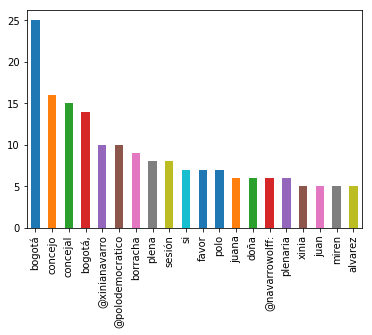

In [187]:
cruceBusqueda[0:20].plot(kind='bar')

# HashTags mas relevantes

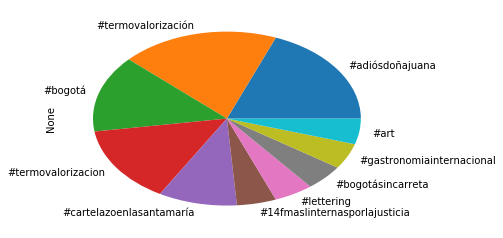

In [189]:
HashTags = cruceBusqueda.filter(regex="#(\w+)")
HashTags[0:10].plot(kind="pie")

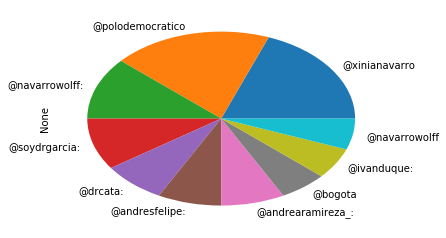

In [191]:
menciones = cruceBusqueda.filter(regex="@(\w+)")
menciones[0:10].plot(kind="pie")